<a href="https://colab.research.google.com/github/primojr/estudos_python/blob/master/py/rede_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Objetivo:

## Treinar o modelo usando `MLPClassifier` e comprar o resultado do `randon_forest`


## 1.Importar bibliotecas 

In [23]:
from sklearn import datasets 
from sklearn.neural_network import  MLPClassifier 

# # Bibliotecas Auxiliares
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(13)

df = pd.read_csv("dfFAmostra.csv", delimiter=";")

# # TensorFlow e tf.keras
# import tensorflow as tf
# from tensorflow import keras


# print(tf.__version__)

In [24]:
df.head(2)

,id,system,sexo_f,class_cep,t.idade_ate30,t.br,t.inpp,t.offus,t.b2w,t.lasa,t.ampl_rec,t.ampl_app,t.frente_offus_inapp,t.band_outras,classe1
0,e281e652-c369-4a8b-9a36-6e085cfcfca5,android,1,B.Neutro,0,0,0,0,0,1,-5.225747,-1.120118,0,0,SemCartaoApp
1,f987742c-4e4f-418b-a95d-2fedba305f4f,android,0,B.Neutro,0,0,0,1,0,0,-6.654153,2.538974,0,0,ComCartaoApp


# 2. Ajustes na base

In [25]:
# Sys
df['system'] = df['system'].replace('android','1')
df['system'] = df['system'].replace('ios','0')
df['system'] = df['system'].astype(float)

# # Classe cep
df['class_cep'].value_counts()
df['class_cep'] = df['class_cep'].replace('A.Ruim','0')
df['class_cep'] = df['class_cep'].replace('B.Neutro','1')
df['class_cep'] = df['class_cep'].replace('C.Medio','2')
df['class_cep'] = df['class_cep'].replace('D.Bom','3')
df['class_cep'] = df['class_cep'].replace('E.MuitoBom','4')
df['class_cep'] = df['class_cep'].astype(float)


## Binario resposta
df.loc[df['classe1'] == 'ComCartaoApp', 'Class'] = 1
df.loc[df['classe1'] != 'ComCartaoApp', 'Class'] = 0
df = df.drop('classe1',axis=1)
df.head()


# Remover na()
df = df.dropna()
df = df.reset_index()

#I Tipos dos dados
df.dtypes

index                     int64
id                       object
system                  float64
sexo_f                    int64
class_cep               float64
t.idade_ate30             int64
t.br                      int64
t.inpp                    int64
t.offus                   int64
t.b2w                     int64
t.lasa                    int64
t.ampl_rec              float64
t.ampl_app              float64
t.frente_offus_inapp      int64
t.band_outras             int64
Class                   float64
dtype: object

# 3. Separar amostra e treino

In [27]:
#df = df.loc[:,df.columns[1:]]
X = df.loc[:, df.columns[2:14]]
y = df.loc[:,['Class']]

n_aleatorio = np.arange(df.shape[0])
np.random.shuffle(n_aleatorio)

X_train = X.loc[n_aleatorio[:3000],:]
X_test  = X.loc[n_aleatorio[3000:],:]

y_train = y.loc[n_aleatorio[:3000],:]
y_test  = y.loc[n_aleatorio[3000:],:]


# 4. Treino do modelo




## 4.2 MPLClassifier

- Paramentros:
  -hidden_layer_sizes =  
  - activation = Função de ativação  
  - max_inter = Maximo de interação  
  - learning_rate_init =  
  

In [51]:
from pandas.core.common import random_state
clf = MLPClassifier(solver = 'adam',
                    hidden_layer_sizes=(2,) ,
                    learning_rate_init=0.00001, 
                    activation='logistic',
                    max_iter = 1500,
                    random_state = 1
                    )

clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.77309258, 0.22690742],
       [0.68895414, 0.31104586],
       [0.68454003, 0.31545997],
       ...,
       [0.73594836, 0.26405164],
       [0.63393082, 0.36606918],
       [0.71925994, 0.28074006]])

### 4.2.1 Validar ajuste

In [52]:
# Categorizar a Classe de previsão
y_linha = pd.DataFrame(y_pred)
y_linha.loc[y_linha[1] >= .5, 'Class'] = 1
y_linha.loc[y_linha[1] <  .5, 'Class'] = 0 

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_linha['Class'])

0.5489078822412156

## 4.2 Treino usando keras

In [53]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


94/94 [==============================] - 1s 4ms/step - loss: 0.7846 - accuracy: 0.7163 - precision: 0.6907 - recall: 0.6634
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4932 - accuracy: 0.7590 - precision: 0.7263 - recall: 0.7409
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4862 - accuracy: 0.7680 - precision: 0.7464 - recall: 0.7297
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4894 - accuracy: 0.7653 - precision: 0.7327 - recall: 0.7491
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4767 - accuracy: 0.7693 - precision: 0.7413 - recall: 0.7446
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4876 - accuracy: 0.7640 - precision: 0.7418 - recall: 0.7252
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4899 - accuracy: 0.7703 - precision: 0.7383 - recall: 0.7543
Epoch 8/100
94/94 [==============================] - 0s 4ms/

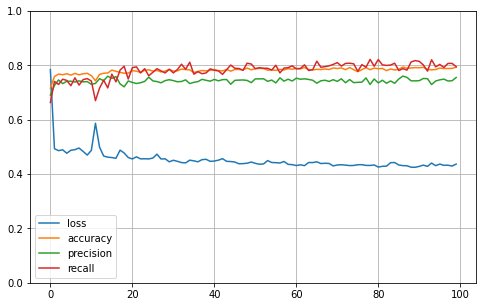

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [50]:
y_pred = model.predict(X_test)
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(y_pred)
]